# CRIME SCENE DO NOT CROSS


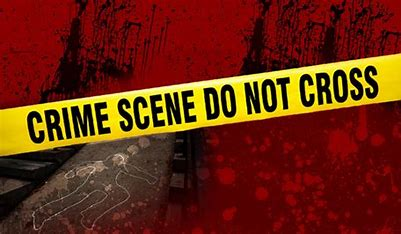

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [4]:
sns.set()

In [5]:
%matplotlib inline

In [6]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [7]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [8]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [9]:
df.tail()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494
9016,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281


In [10]:
df.last_valid_index()

9016

In [11]:
print(df.shape)

(9017, 33)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [13]:
df.head(10)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,43,1792,7,139,129,378,0,369,2426,7848
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,0,3137,24,118,27,746,0,409,1512,11831
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,33,1392,62,414,81,224,0,322,1726,5811
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,47,0,47,41,...,73,1026,17,180,336,172,0,209,1450,4582


In [14]:
df.drop(df.index[[9016]],inplace=True)

In [15]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [16]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,...,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000
mean,2006.628438,89.292036,78.075311,9.895297,53.045807,0.005768,53.040040,79.158718,58.540151,20.618567,...,25.220386,747.885315,20.231145,100.521406,27.518412,194.143301,0.197870,222.212178,2174.312112,5310.229259
std,3.463353,327.292566,303.462373,59.524954,190.751563,0.115230,190.735586,317.647948,246.950753,88.591134,...,98.885756,3024.274099,96.975610,394.080113,167.246581,832.030378,2.415172,936.054353,7988.881423,18525.405339
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.750000,853.000000
50%,2007.000000,38.000000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.000000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,528.250000,16.000000,76.000000,13.000000,135.000000,0.000000,176.250000,1607.250000,3972.000000
max,2012.000000,7601.000000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


# EDA

In [17]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

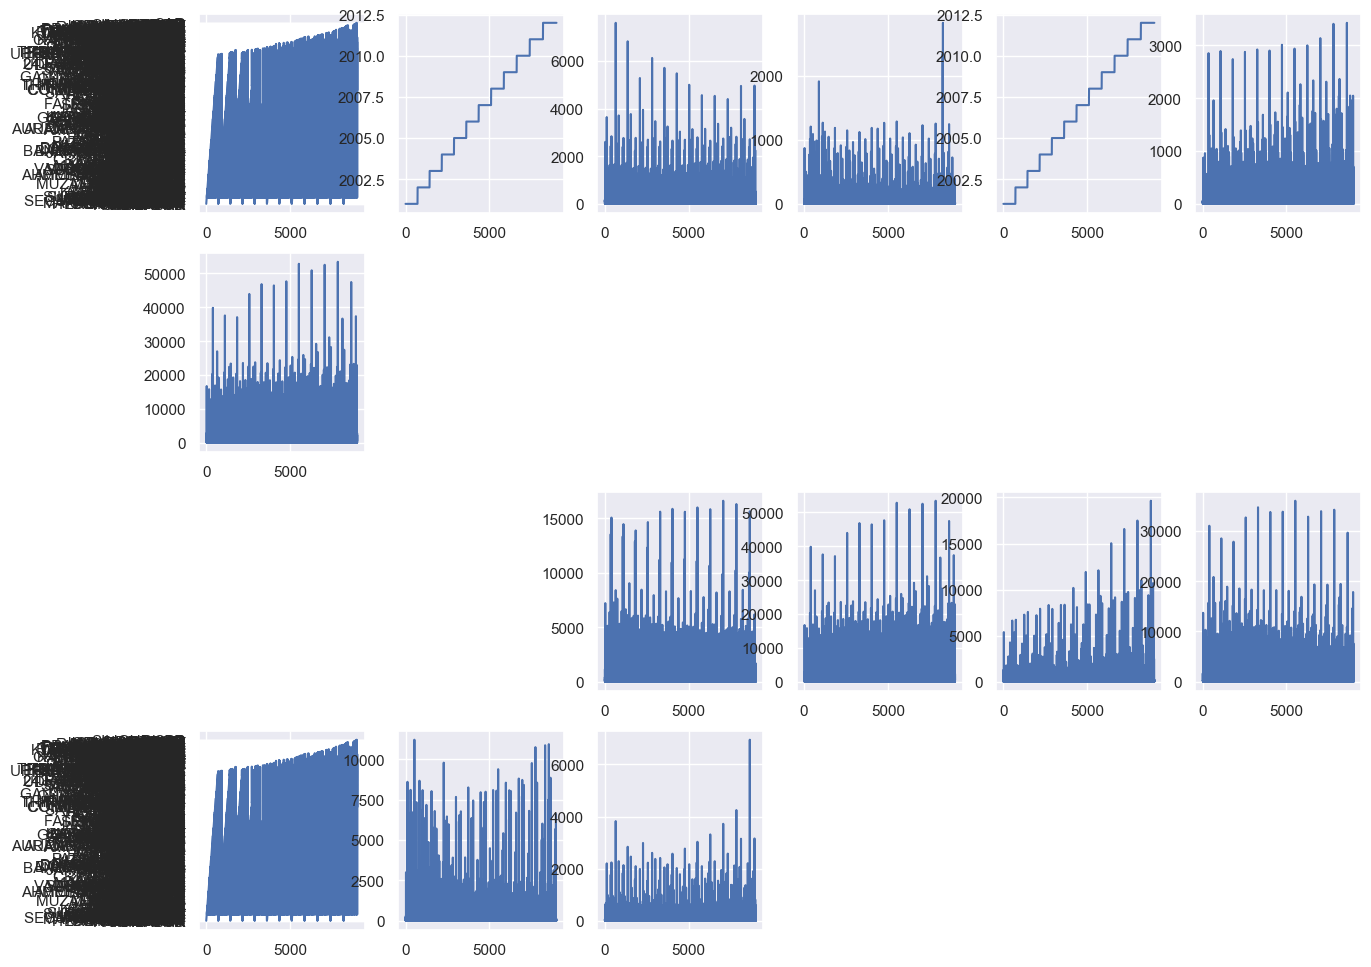

In [18]:
fig = plt.figure(figsize = (15, 15))

plt.subplot(5, 6, 1) ; plt.plot(df.  DISTRICT ) ; plt.subplot(5, 6, 15) ; plt.plot(df. BURGLARY)
plt.subplot(5, 6, 2) ; plt.plot(df.YEAR) ; plt.subplot(5, 6, 16) ; plt.plot(df. THEFT)
plt.subplot(5, 6, 3) ; plt.plot(df.	MURDER ) ; plt.subplot(5, 6, 17) ; plt.plot(df.CHEATING)
plt.subplot(5, 6, 4) ; plt.plot(df.ARSON) ; plt.subplot(5, 6, 18) ; plt.plot(df['OTHER THEFT'])
plt.subplot(5, 6, 5) ; plt.plot(df.YEAR) ; plt.subplot(5, 6, 19) ; plt.plot(df.DISTRICT	 )
plt.subplot(5, 6, 6) ; plt.plot(df.RAPE) ; plt.subplot(5, 6, 20) ; plt.plot(df.RIOTS)
plt.subplot(5, 6, 7) ; plt.plot(df.THEFT) ; plt.subplot(5, 6, 21) ; plt.plot(df.ROBBERY)
plt.show()

In [19]:
print("feature_names")

feature_names


In [20]:
average=["CrimeType"]
print(average)

['CrimeType']


In [21]:
feature_names = df.iloc[:, 1:30].columns

In [22]:
target = df.iloc[:1, 30: ].columns

In [23]:
print(feature_names)

Index(['DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],
      dtype='object')


In [24]:
print(target)

Index(['CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], dtype='object')


In [25]:
data_features = df[feature_names]

In [26]:
data_features

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES
0,ADILABAD,2001,101,60,17,50,0,50,46,30,...,16,104,1,30,1131,16,149,34,175,0
1,ANANTAPUR,2001,151,125,1,23,0,23,53,30,...,11,65,8,69,1543,7,118,24,154,0
2,CHITTOOR,2001,101,57,2,27,0,27,59,34,...,33,209,9,38,2088,14,112,83,186,0
3,CUDDAPAH,2001,80,53,1,20,0,20,25,20,...,12,37,2,23,795,17,126,38,57,0
4,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,...,50,220,3,41,1244,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,WEST,2012,52,37,10,79,0,79,454,256,...,36,202,2,18,227,18,53,6,327,0
9012,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,...,0,0,0,3,3,0,1,0,1,0
9013,TOTAL,2012,0,0,0,0,0,0,0,0,...,0,0,0,3,3,0,1,0,1,0
9014,KARAIKAL,2012,5,6,2,6,0,6,2,2,...,1,15,1,1,186,0,2,0,1,0


In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9011    False
9012    False
9013    False
9014    False
9015    False
Length: 9016, dtype: bool

In [28]:
df[df.duplicated()]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES


In [29]:
df.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,1.000000,-0.013089,-0.001033,-0.004727,0.029742,-0.000189,0.029745,0.060233,0.074227,0.009057,...,-0.013723,0.004178,0.011439,0.014917,-0.010778,0.053797,-0.017573,0.042234,0.020402,0.019817
MURDER,-0.013089,1.000000,0.958119,0.781318,0.813853,0.150548,0.813830,0.835741,0.786340,0.804645,...,0.726786,0.736570,0.910126,0.727663,0.665952,0.710619,0.316326,0.795783,0.739605,0.846450
ATTEMPT TO MURDER,-0.001033,0.958119,1.000000,0.759361,0.778746,0.124545,0.778736,0.829042,0.783604,0.788249,...,0.690068,0.718514,0.910485,0.712848,0.614261,0.660294,0.306047,0.766367,0.759126,0.831710
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.004727,0.781318,0.759361,1.000000,0.557076,0.073365,0.557078,0.737056,0.733248,0.598800,...,0.326293,0.345942,0.867304,0.427580,0.541454,0.551060,0.164427,0.508449,0.437657,0.519959
RAPE,0.029742,0.813853,0.778746,0.557076,1.000000,0.138947,1.000000,0.743484,0.728699,0.634528,...,0.744232,0.764800,0.729021,0.896128,0.498078,0.772842,0.256227,0.722209,0.793904,0.858242
CUSTODIAL RAPE,-0.000189,0.150548,0.124545,0.073365,0.138947,1.000000,0.138355,0.141542,0.130876,0.142683,...,0.115959,0.119203,0.117672,0.097176,0.068288,0.102753,0.024198,0.123451,0.106990,0.126148
OTHER RAPE,0.029745,0.813830,0.778736,0.557078,1.000000,0.138355,1.000000,0.743461,0.728681,0.634495,...,0.744224,0.764792,0.729011,0.896144,0.498079,0.772845,0.256234,0.722195,0.793906,0.858238
KIDNAPPING & ABDUCTION,0.060233,0.835741,0.829042,0.737056,0.743484,0.141542,0.743461,1.000000,0.981832,0.848660,...,0.604642,0.581318,0.843856,0.593958,0.460159,0.753505,0.242140,0.720097,0.661942,0.751826
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.074227,0.786340,0.783604,0.733248,0.728699,0.130876,0.728681,0.981832,1.000000,0.732875,...,0.574696,0.552605,0.811342,0.588422,0.439615,0.758666,0.154433,0.722737,0.644534,0.727662
KIDNAPPING AND ABDUCTION OF OTHERS,0.009057,0.804645,0.788249,0.598800,0.634528,0.142683,0.634495,0.848660,0.732875,1.000000,...,0.565989,0.543940,0.764044,0.489422,0.424482,0.586922,0.437717,0.567291,0.576765,0.667329


<AxesSubplot:>

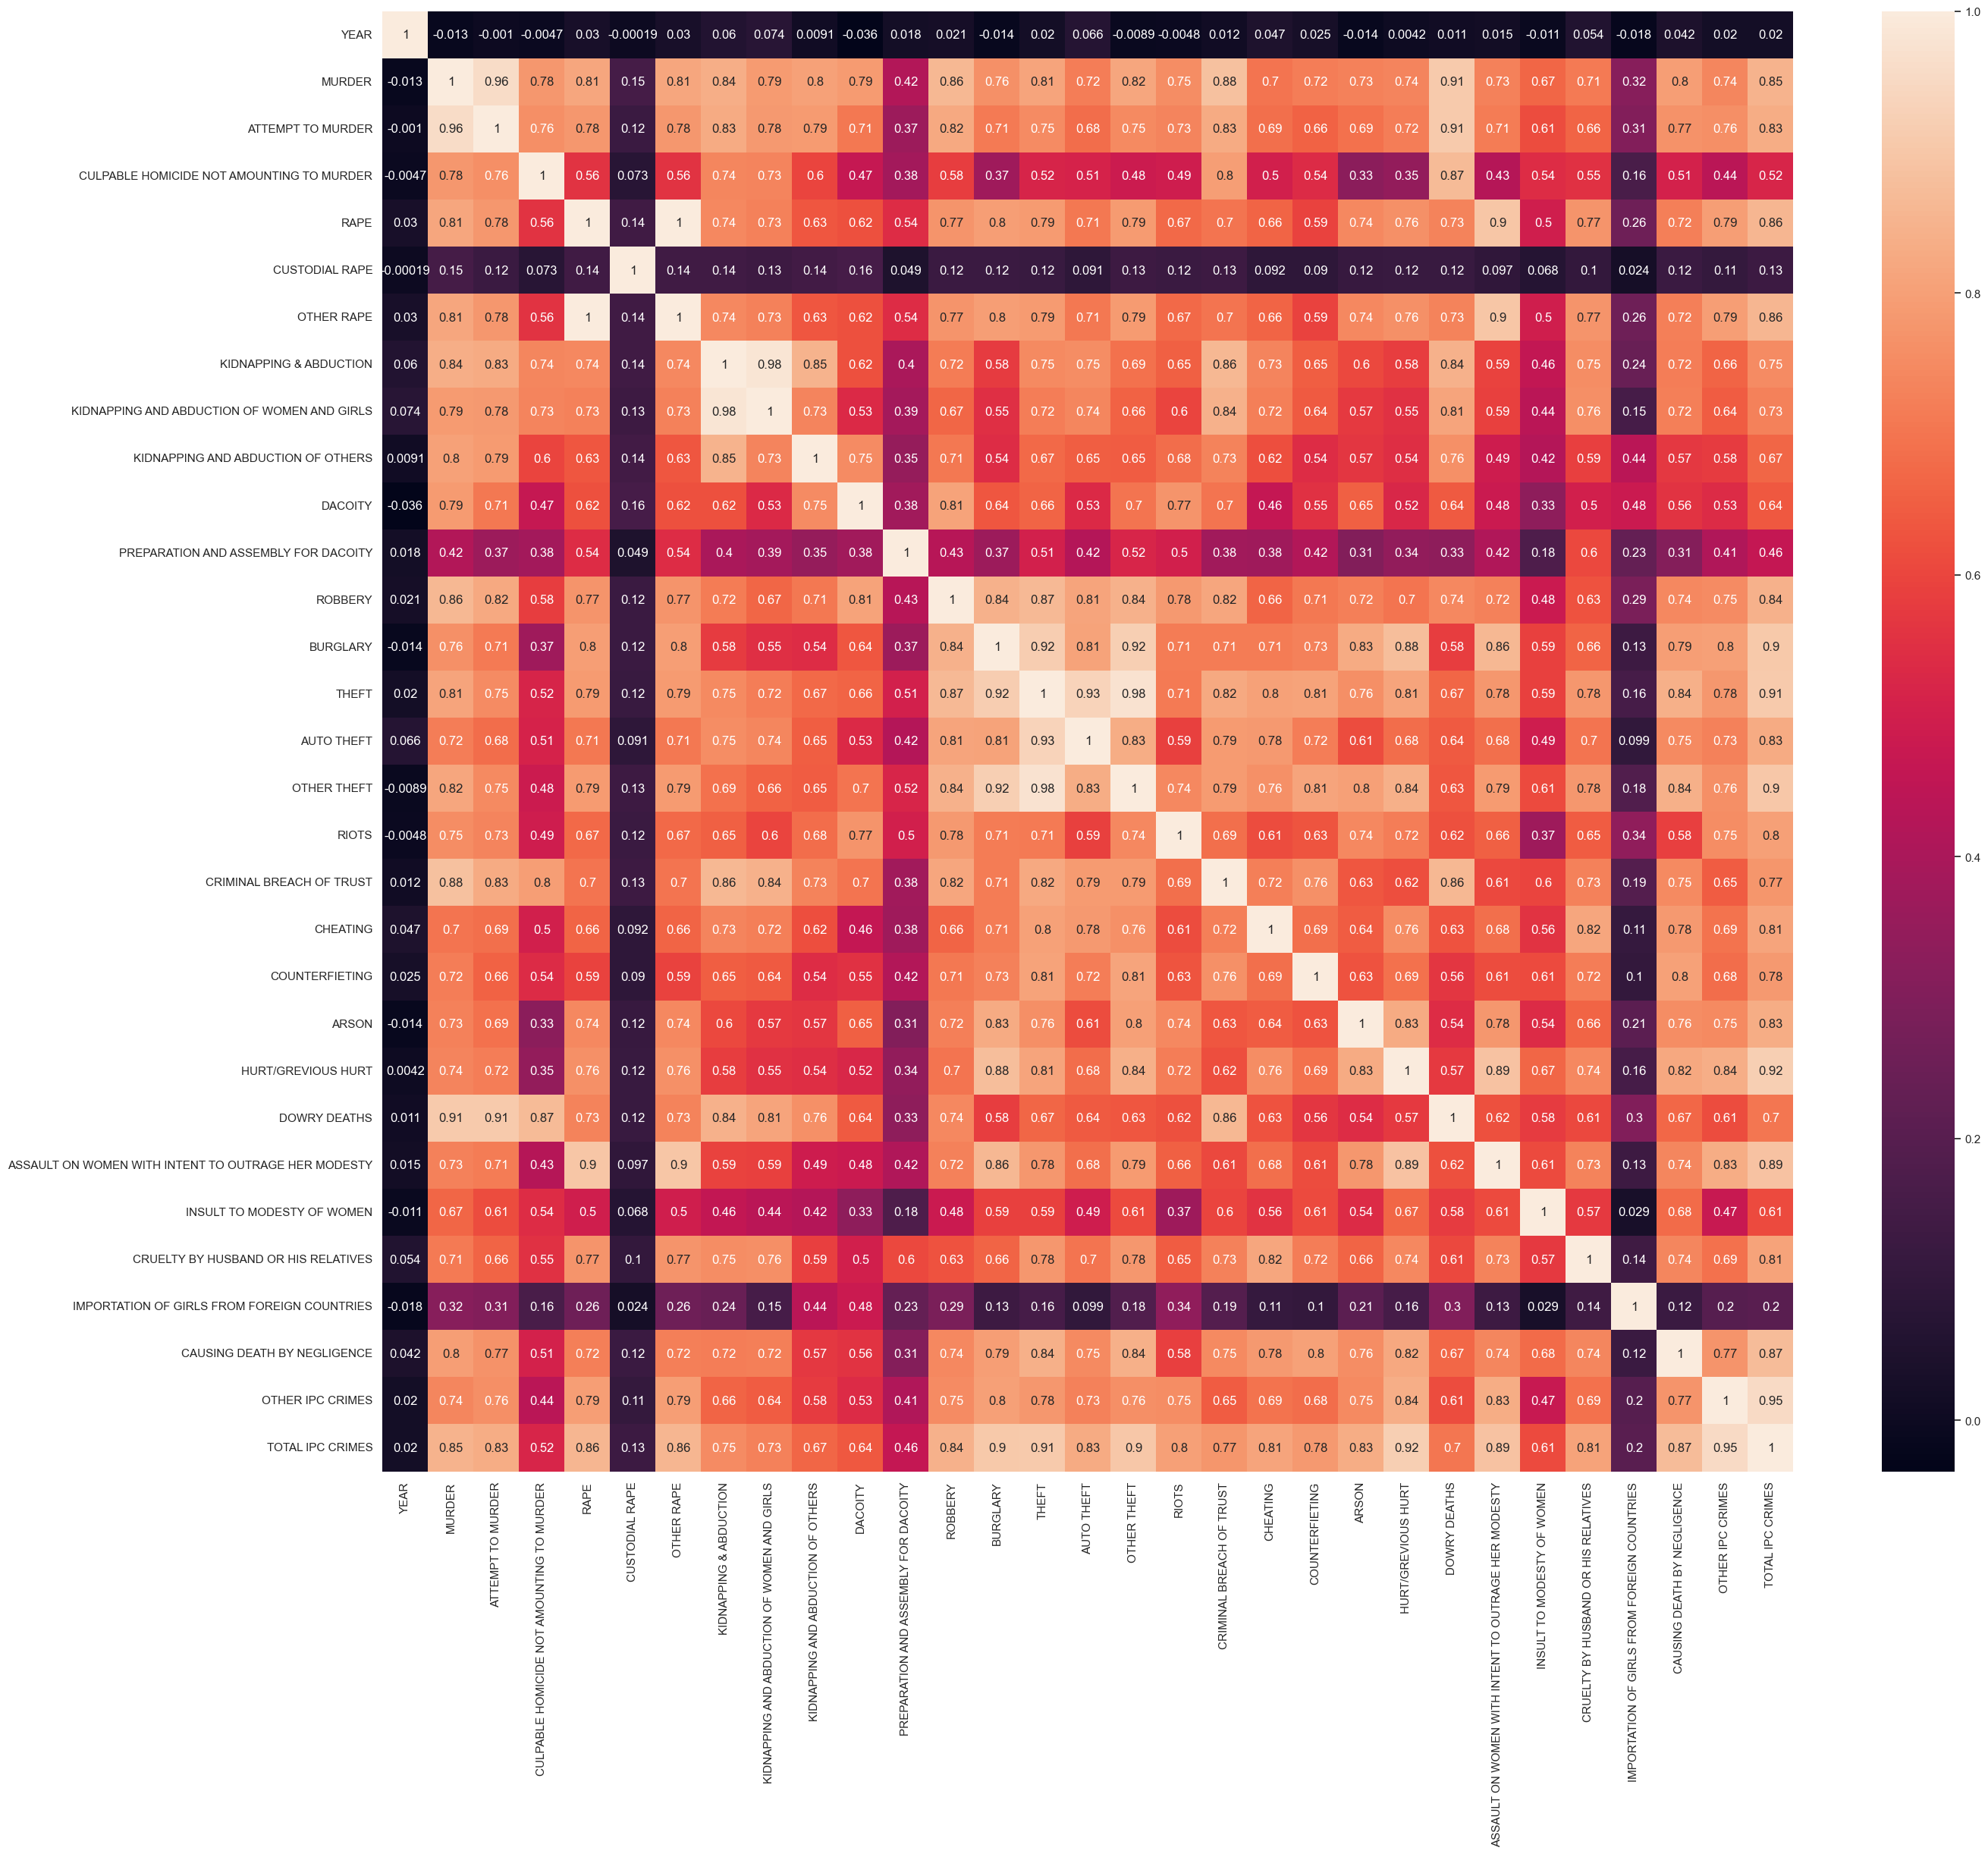

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)

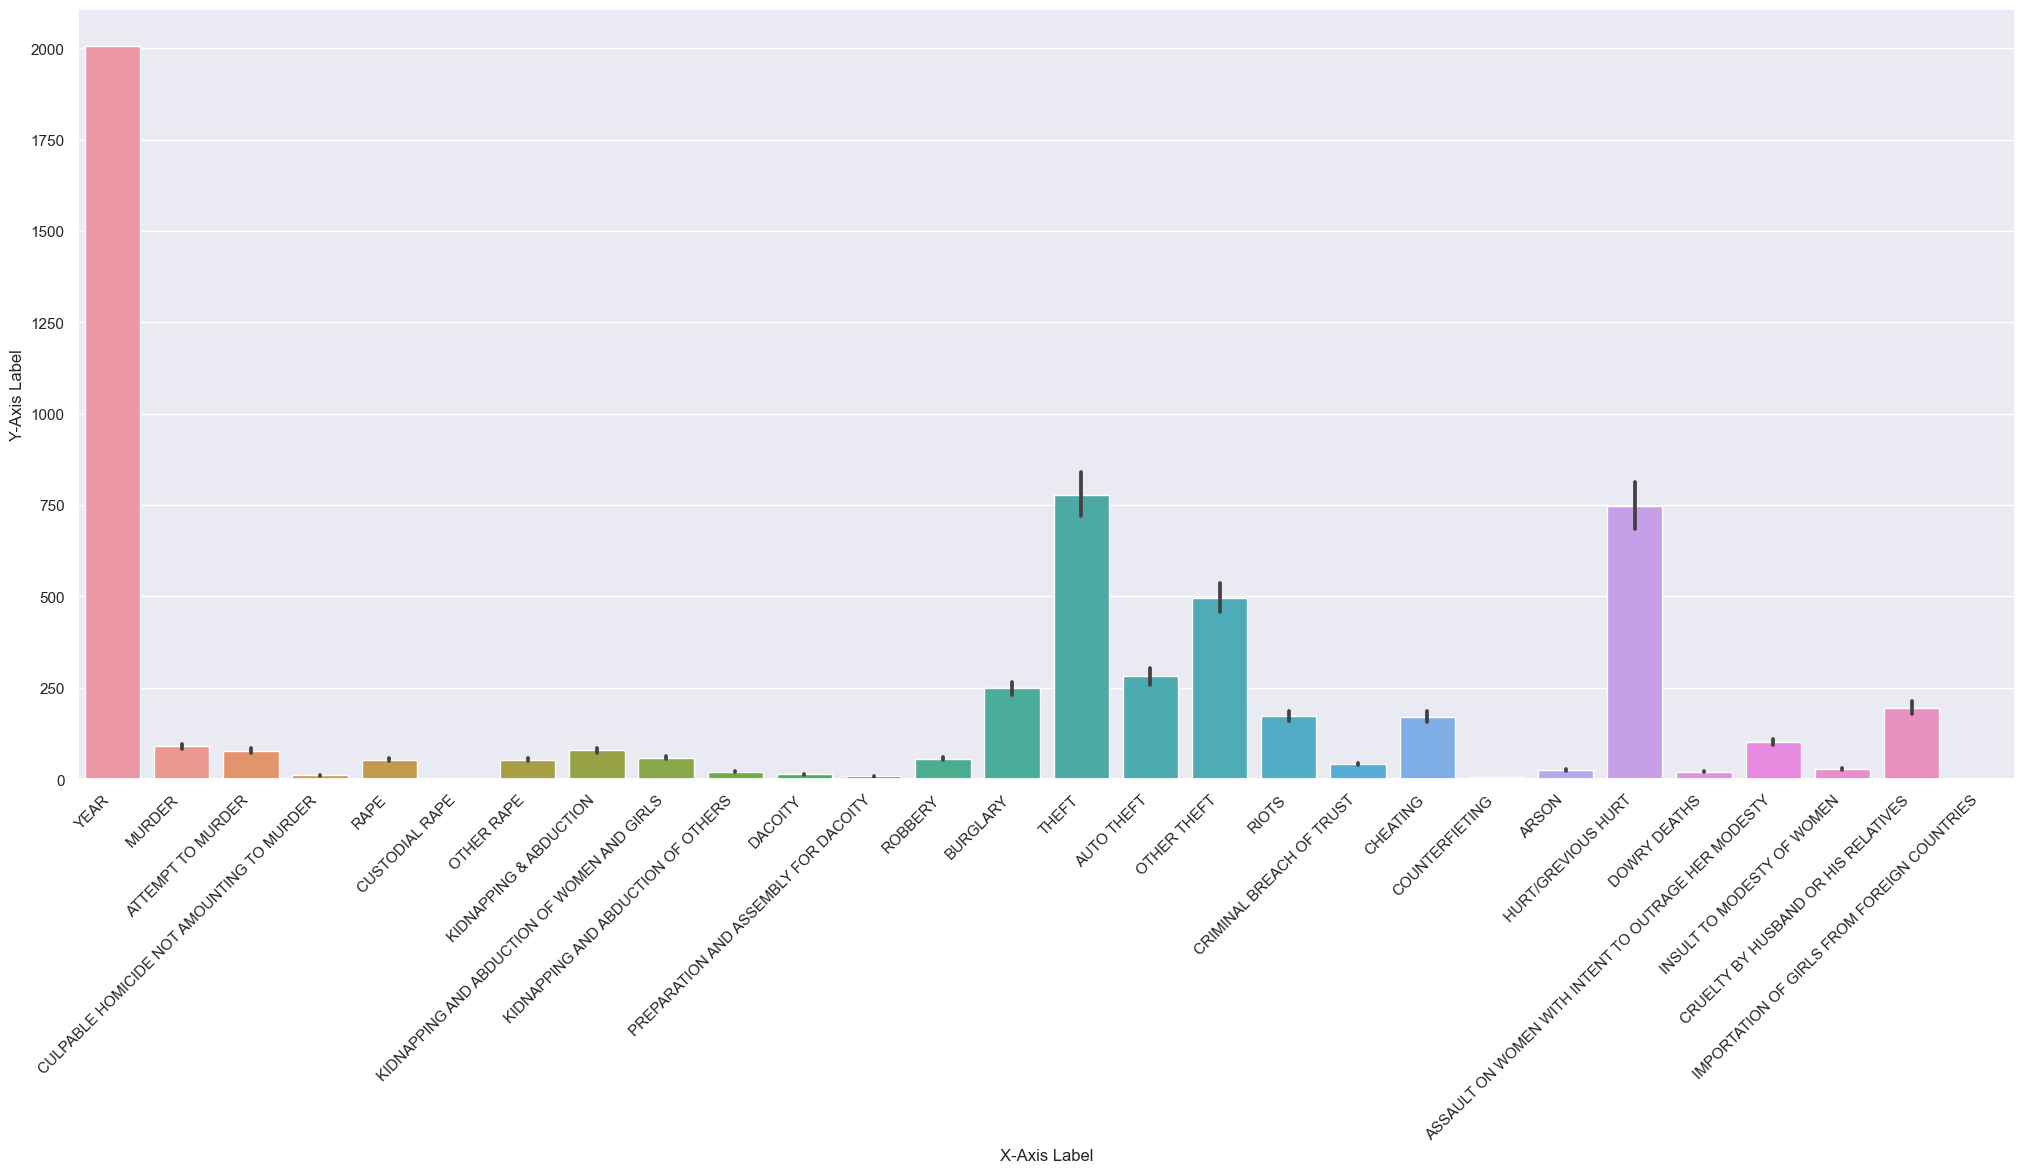

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(25, 10))
bar_plot = sns.barplot(data=data_features)  # Assuming data_features is your DataFrame or dataset

# Rotate the x-axis labels diagonally
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')
# Add labels and title
bar_plot.set_xlabel('X-Axis Label')
bar_plot.set_ylabel('Y-Axis Label')

plt.show()

<AxesSubplot:>

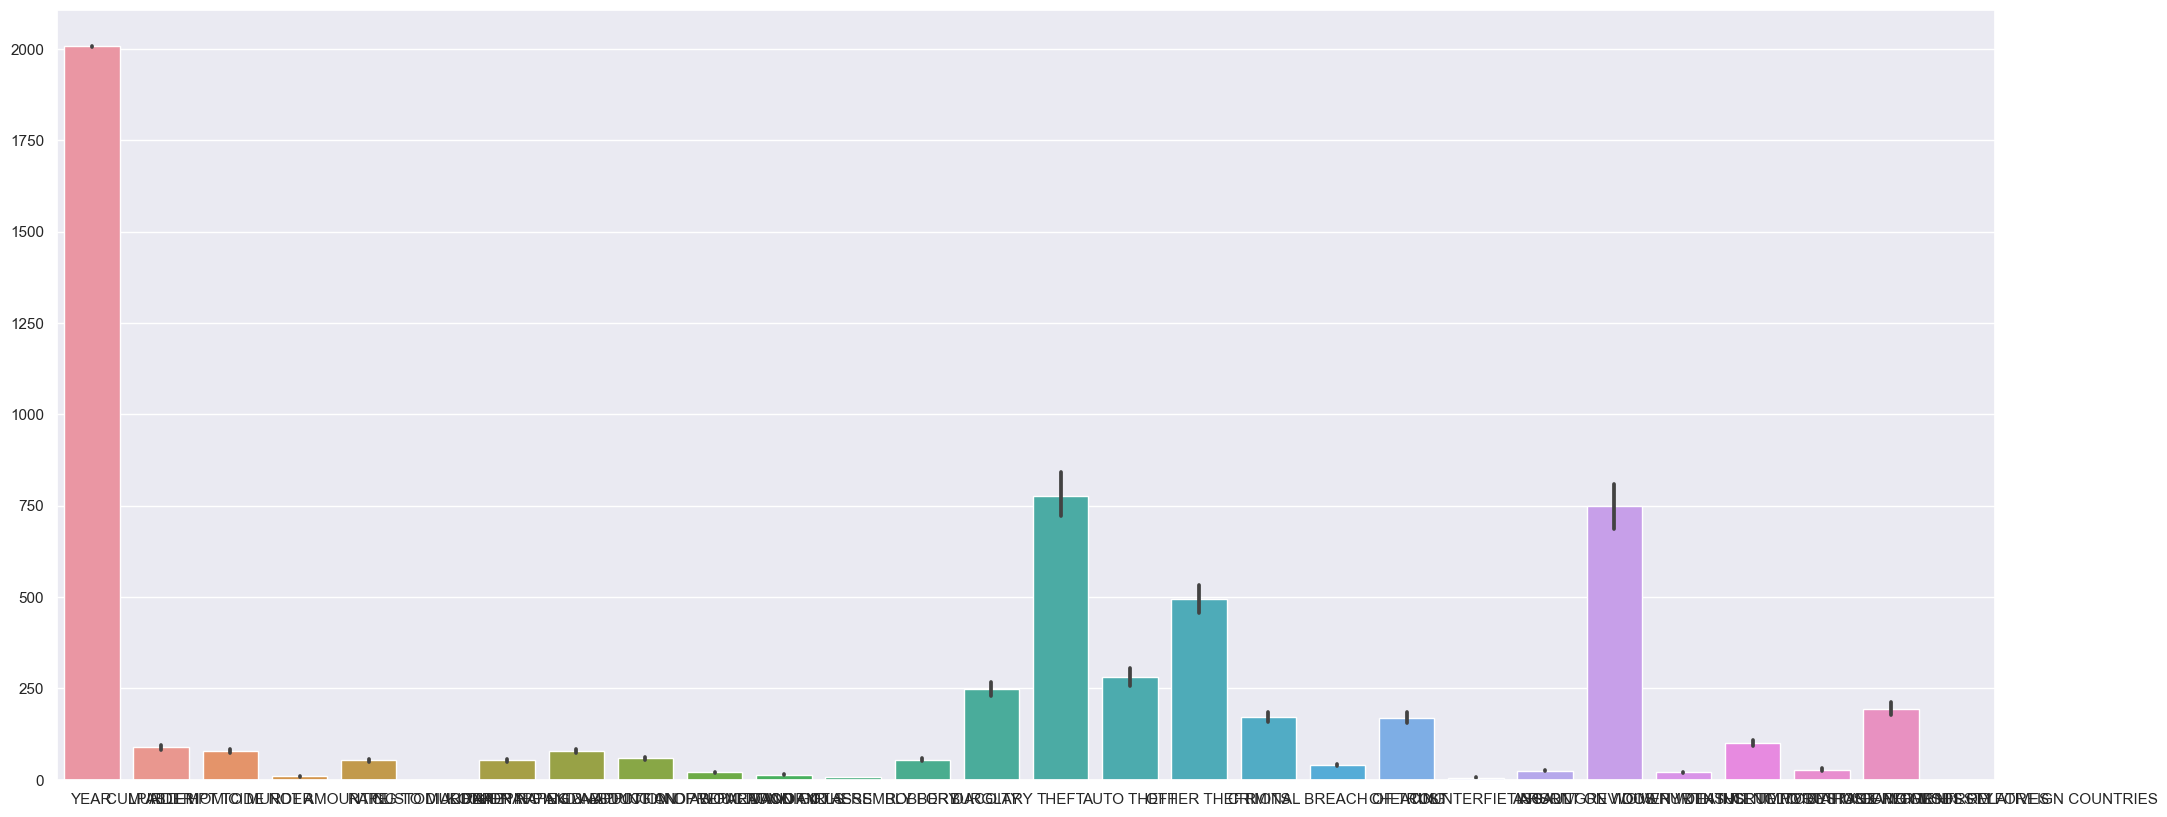

In [32]:
sns.set()
plt.figure(figsize=(25,10))
sns.barplot(data_features)


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9016 entries, 0 to 9015
Data columns (total 29 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   DISTRICT                                             9016 non-null   object
 1   YEAR                                                 9016 non-null   int64 
 2   MURDER                                               9016 non-null   int64 
 3   ATTEMPT TO MURDER                                    9016 non-null   int64 
 4   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9016 non-null   int64 
 5   RAPE                                                 9016 non-null   int64 
 6   CUSTODIAL RAPE                                       9016 non-null   int64 
 7   OTHER RAPE                                           9016 non-null   int64 
 8   KIDNAPPING & ABDUCTION                               9016 non-null   int64 
 9